# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 

The dataset contains **1500 rows and 8 columns**. The observations are as follows:
- Booking ID: Same as description, all values are unique.
- Months as member: Same as description, no missing values or values less than one.
- Weight: 20 missing values, replaced values with mean weight.
- Days before: Some values have the string 'days', the 'days' string was replaced with an empty string and converted the column datatype to int. No missing values.
- Day of week: Some Monday and Wednesday weren't shortened and some friday values have a perdiod, these were replaced using a dictionary to their shortened counterparts. The datatype was converted into ordered categorical afterwards. No missing values.
- Time: Same as description without missing values. Datatype was converted to unordered categorical datatype.
- Category: The string '-' was used for missing values which was replaced with 'unknown'. Values are same as description and datatype was converted to unordered categorical datatype.
- Attended: Same as description without missing values.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

df = pd.read_csv('fitness_class_2212.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


Initial observations:

- weight has 20 missing values
- days_before has an object data type, expecting int since it has a numerical discrete description

### Data Cleaning and Validation

In [22]:
print(df['booking_id'].nunique())

1500


In [23]:
invalid_months_as_member = df[df['months_as_member'] < 1]
print(invalid_months_as_member)

Empty DataFrame
Columns: [booking_id, months_as_member, weight, days_before, day_of_week, time, category, attended]
Index: []


In [24]:
weight_nulls = df[df['weight'].isna()].index
print(weight_nulls,'\n')
df['weight'] = df['weight'].fillna(np.round(df['weight'].mean(),2))
print(df.iloc[weight_nulls].head(),'\n')
invalid_weight = df[df['weight'] < 40.00]
print(invalid_weight)

Int64Index([ 114,  211,  315,  366,  482,  552,  655,  734,  742,  781,  864,
             930,  980,  989, 1075, 1119, 1266, 1336, 1363, 1416],
           dtype='int64') 

     booking_id  months_as_member  weight  ... time category attended
114         115                14   82.61  ...   AM     HIIT        0
211         212                16   82.61  ...   AM  Cycling        0
315         316                 5   82.61  ...   AM     HIIT        0
366         367                 4   82.61  ...   AM     Aqua        0
482         483                14   82.61  ...   PM     Aqua        0

[5 rows x 8 columns] 

Empty DataFrame
Columns: [booking_id, months_as_member, weight, days_before, day_of_week, time, category, attended]
Index: []


In [25]:
not_float = pd.to_numeric(df['days_before'], errors='coerce').isna()
index_not_float = df[not_float == True].index
print(df.iloc[index_not_float]['days_before'].head())

93     12 days
189     6 days
192    12 days
236    13 days
238     3 days
Name: days_before, dtype: object


In [26]:
df['days_before'] = df['days_before'].str.replace('days','')
print(df.iloc[index_not_float]['days_before'].head(),'\n')
df['days_before'] = df['days_before'].astype(int)
print(df['days_before'].dtype,'\n')
not_valid = df[df['days_before'] < 1]
print(not_valid)

93     12 
189     6 
192    12 
236    13 
238     3 
Name: days_before, dtype: object 

int64 

Empty DataFrame
Columns: [booking_id, months_as_member, weight, days_before, day_of_week, time, category, attended]
Index: []


In [27]:
print(df['day_of_week'].value_counts(),'\n')
to_replace = {'Wednesday':'Wed','Fri.':'Fri','Monday':'Mon'}
df['day_of_week'] = df['day_of_week'].replace(to_replace)
df['day_of_week'] = df['day_of_week'].astype('category')
df['day_of_week'] = df['day_of_week'].cat.set_categories(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered=True)
print(df['day_of_week'].value_counts(),'\n')
print(df['day_of_week'].dtype)

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64 

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64 

category


In [28]:
print(df['time'].value_counts())
df['time'] = df['time'].astype('category')
print(df['time'].dtype)

AM    1141
PM     359
Name: time, dtype: int64
category


In [29]:
print(df['category'].value_counts(),'\n')
df['category'] = df['category'].str.replace('-','unknown')
print(df['category'].value_counts())
df['category'] = df['category'].astype('category')
print(df['category'].dtype)

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64 

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64
category


In [30]:
print(df['attended'].value_counts())

0    1046
1     454
Name: attended, dtype: int64


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 63.8 KB
None


## Task 2
Looking at the counts of attendees from different categories, it can be seen that it is proportional to the amount of the number of registers in the particular category. A side by side barplot would easily visualize on how close the proportions are. The proportion of attendees from each category is also plotted. It can be observed that there is little difference from attendee proportions from each category.

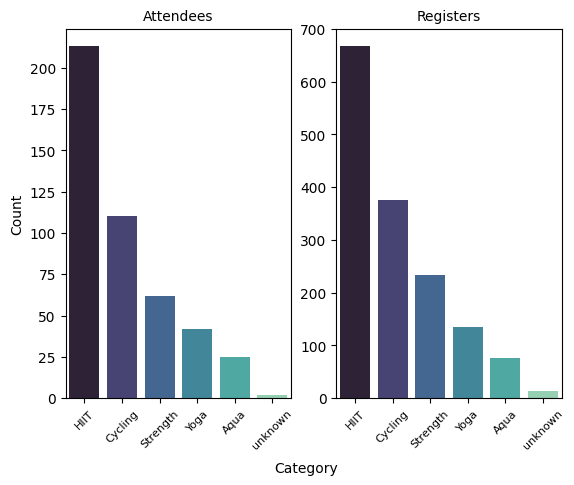

In [32]:
sns.set_palette('mako')
has_attended = df[df['attended'] == 1]
color_order = ['Aqua', 'Cycling', 'HIIT', 'Strength', 'unknown']

fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = sns.countplot(x='category',data=has_attended,order=has_attended['category'].value_counts().index, ax=ax1)
ax1.title.set_text('Attendees')
ax1.title.set_size(10)
ax1.tick_params(axis='x',labelsize=8, labelrotation=45)
ax1.set(xlabel=None, ylabel='Count')

ax2 = sns.countplot(x='category', data=df, order=df['category'].value_counts().index, ax=ax2)
ax2.title.set_text('Registers')
ax2.title.set_size(10)
ax2.set(xlabel=None, ylabel=None)
ax2.tick_params(axis='x',labelsize=8, labelrotation=45)

fig.supxlabel('Category', fontsize=10, y=-0.05)
plt.show()



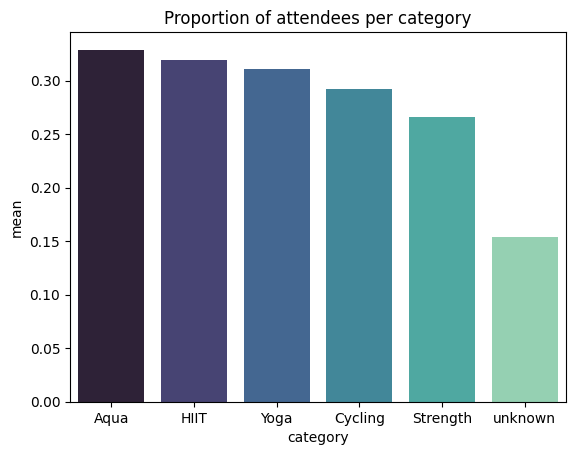

In [33]:
avg_attendees = df.groupby('category', as_index=False)['attended'].agg('mean').sort_values('attended')
sns.barplot(x='category', y='attended', data=avg_attendees, order=avg_attendees.sort_values('attended', ascending=False)['category'])
plt.ylabel('mean')
plt.title('Proportion of attendees per category')
plt.show()

## Task 3
An exponential distribution is observed that is skewed to the right. Most registrees are between 1 and 20 and having outliers as high as greater than 140.

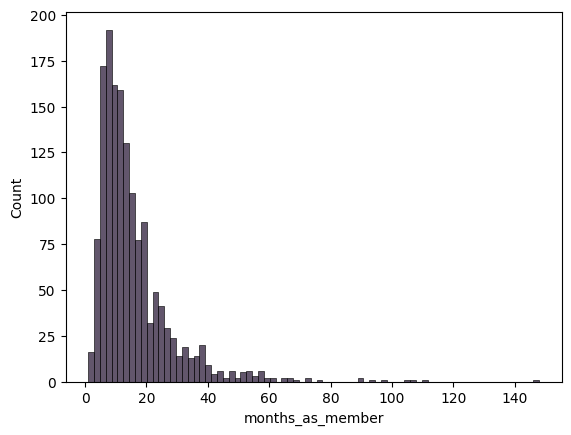

In [34]:
sns.histplot(x='months_as_member', data=df)
plt.show()

## Task 4
It is observed that those who have been members for a longer time has a higher probability of attending the class. According to the data provided, those who have been members for at least 60 months (5 years) have not missed a single class. A possible explanation is that long term members have already integrated attending fitness classes in their schedule since it is already a part of their lifestyle.

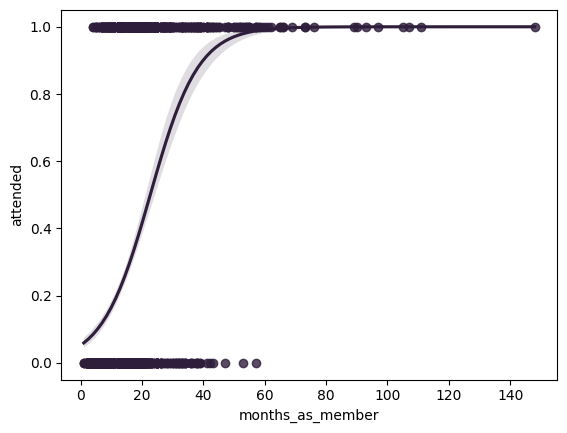

In [35]:
sns.regplot(x='months_as_member', y='attended', data=df, logistic=True)
plt.show()

## Task 5
Predicting if a member will attend the class or not is a classification machine learning problem.

## Task 6

Baseline Model - Logistic Regression Model

The remaining columns are explored for feature selection

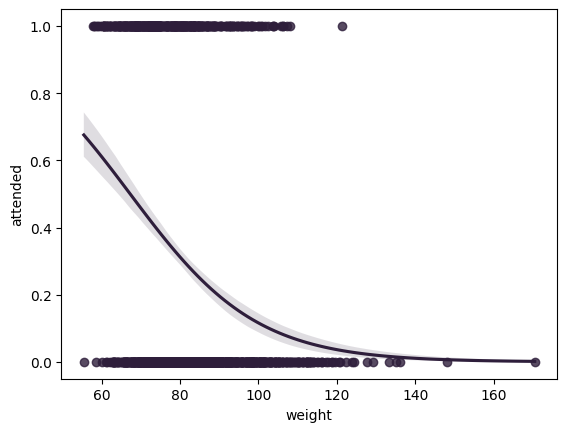

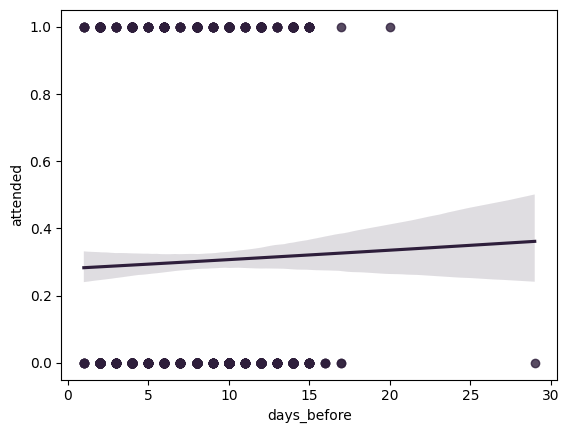

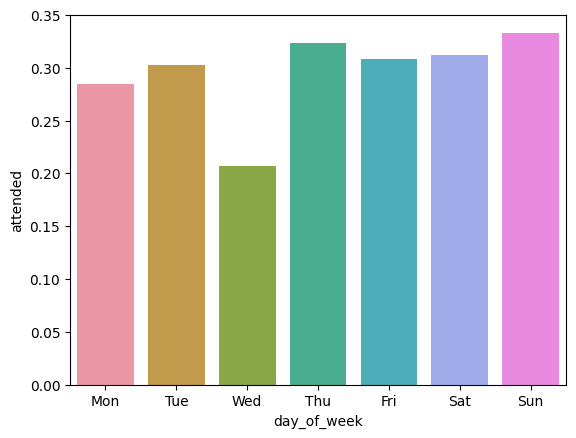

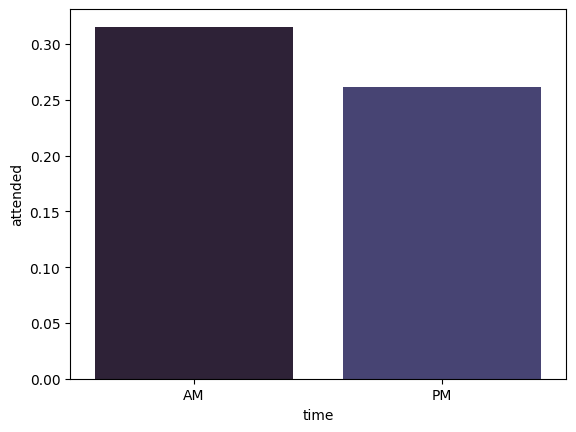

In [36]:
num = ['weight', 'days_before']
cat = ['day_of_week', 'time']

for col in num:
    sns.regplot(x=col, y='attended', data=df, logistic=True)
    plt.show()
    
for col in cat:
    grouped = df.groupby(col, as_index=False)['attended'].agg('mean')
    sns.barplot(x=col, y='attended', data=grouped)
    plt.show()

Effects of days before seems negligible and will be dropped from the dataframe.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

seed = 32

X = df.drop(['booking_id', 'days_before', 'attended'], axis=1)
y = df['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

num_sel = make_column_selector(dtype_exclude='category')
cat_sel = make_column_selector(dtype_include='category')
num_cols = num_sel(X)
cat_cols = cat_sel(X)

preprocessor = ColumnTransformer([
    ('StandardScaler', StandardScaler(), num_cols),
    ('OneHotEncoder', OneHotEncoder(), cat_cols)
])

reg_pipeline = make_pipeline(preprocessor, LogisticRegression(random_state=seed))
reg_pipeline.fit(X_train, y_train)
y_pred_reg = reg_pipeline.predict(X_test)

## Task 7

Comparison Model - Random Forest Classifier Model

In [38]:
forest_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=seed))
forest_pipeline.fit(X_train, y_train)
y_pred_forest = forest_pipeline.predict(X_test)

## Task 8
A **logistic regression model** will be used as a **baseline model** for its simplicity and effectiveness for binary classification. The data is preprocessed by selecting important features, scaling numerical columns, and one hot encoding categorical columns. A **random forest classifier** is used as a **comparison model** for its ability to capture more complex patterns and for its robustness.

## Task 9
**Confusion matrix** and **accuracy score** will be used to evaluate the model. Confusion matrix is used because the model's purpose is to **predict if a member would not attend** so that GoalZone would be able to make space for the class. Hence, knowing which model gives more **true negatives** and **less false negatives** (to lessen the chance of overcrowding the class) would be ideal. **Accuracy score** yields a numeric value to have an **easier objective metric** on selecting a model.

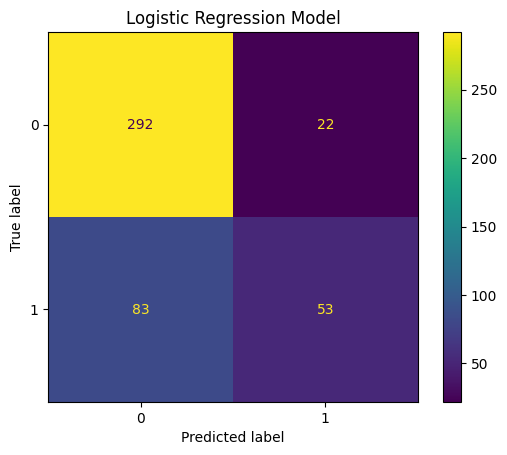

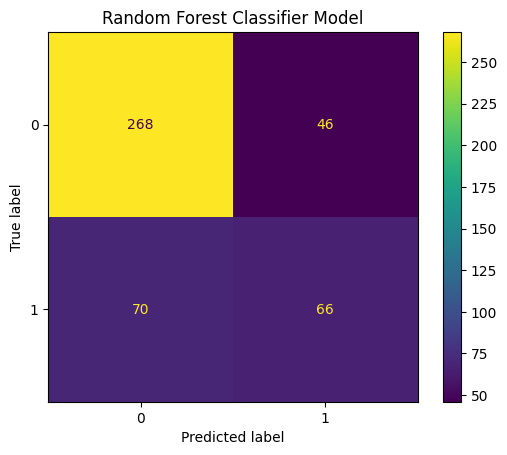

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

models = {'Logistic Regression Model':reg_pipeline, 'Random Forest Classifier Model':forest_pipeline}
for name, model in models.items():
    cm = confusion_matrix(y_test,model.predict(X_test),labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(name)
    plt.show()    

In [40]:
print('Logistic Regression Model Accuracy: {}'.format(accuracy_score(y_test, y_pred_reg)))
print('Random Forest Classifier Model Accuracy: {}'.format(accuracy_score(y_test, y_pred_forest)))

Logistic Regression Model Accuracy: 0.7666666666666667
Random Forest Classifier Model Accuracy: 0.7422222222222222


## Task 10
Based from the metrics, the **logistic regression model is better** by using the **count of true negatives** and **accuracy score**. However, it is important to note that it also **has slightly higher count of false negatives** which has a **slightly higher risk of overcrowding the class** due to attending members that were predicted not to attend.

## Task Requirements

1. For every column in the data:
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many bookings attended the class. Use the visualization to:
- State which category of the variable attended has the most observations
- Explain whether the observations are balanced across categories of the variable attended

3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.
 
4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/ clustering).

6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

10. Explain which model performs better and why.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam